In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

In [ ]:
!pip install pandas_profiling
#!pip install luntaiDs==1.0.3

In [2]:
import pandas as pd
import numpy as np
import sklearn
from bokeh.io import output_notebook, show

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None) # default='warn'
sklearn.set_config(display = 'diagram')
output_notebook()

Loading BokehJS ...

# 1. Load and Train/test Split

In [4]:
df = pd.read_csv("/media/sf_iphone/Loan_Default.csv")
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,0.2000,595.00,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,0.3042,0.00,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,0.2571,9960.00,180.0,not_neg,not_int,not_lpsm,608000.0,sb,pr,home,1U,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,0.8544,0.00,360.0,not_neg,not_int,not_lpsm,788000.0,sb,ir,home,4U,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,0.0816,1226.64,180.0,not_neg,not_int,not_lpsm,728000.0,sb,pr,home,1U,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,0.5824,4323.33,180.0,not_neg,not_int,not_lpsm,278000.0,sb,pr,home,1U,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['Status', 'ID', 'year', 'Interest_rate_spread']), df['Status'], 
    test_size=0.3, stratify = df['Status'], random_state=42
)
# in case index is not matching error
X_train.reset_index(drop = True, inplace=True)
X_test.reset_index(drop = True, inplace=True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

# 2. EDA

In [7]:
from pandas_profiling import ProfileReport

prof = ProfileReport(df, minimal =False)
prof.to_file(output_file='/media/sf_iphone/pandas-profiling-report.html')

/home/luntaixia/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/luntaixia/miniconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/home/luntaixia/miniconda3/lib/python3.9/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/ref

## 2.1 Target Distribution

In [6]:
from ModelingTools.Explore.plots import chart_donut


y_plot = chart_donut(
    donut_arr=y_train.value_counts(dropna = False),
    title = 'Target Distribution'
)
show(y_plot)

(CVXPY) Sep 17 10:40:57 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Sep 17 10:40:57 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


## 2.2 Feature Standalone Distribution

In [7]:
from ModelingTools.Explore.profiling import CategStat, NumericStat, TabularStat

In [8]:
schemas = {
    'loan_limit' : CategStat(),
    'Gender' : CategStat(),
    'approv_in_adv' : CategStat(),
    'loan_type' : CategStat(),
    'loan_purpose' : CategStat(),
    'Credit_Worthiness' : CategStat(),
    'open_credit' : CategStat(),
    'business_or_commercial' : CategStat(),
    'loan_amount' : NumericStat(setaside_zero=True, log_scale=True, xtreme_method='iqr'),
    'rate_of_interest' : NumericStat(setaside_zero=False, log_scale=False, xtreme_method='iqr'),
    #'Interest_rate_spread' : NumericStat(setaside_zero=False, log_scale=False, xtreme_method='iqr'),
    'Upfront_charges' : NumericStat(setaside_zero=True, log_scale=True, xtreme_method='iqr'),
    'term' : CategStat(int_dtype=True),
    'Neg_ammortization' : CategStat(),
    'interest_only' : CategStat(),
    'lump_sum_payment' : CategStat(),
    'property_value' : NumericStat(setaside_zero=True, log_scale=True, xtreme_method='iqr'),
    'construction_type' : CategStat(),
    'occupancy_type' : CategStat(),
    'Secured_by' : CategStat(),
    'total_units' : CategStat(),
    'income' : NumericStat(setaside_zero=True, log_scale=True, xtreme_method='iqr'),
    'credit_type' : CategStat(),
    'Credit_Score' : NumericStat(setaside_zero=False, log_scale=False, xtreme_method=None),
    'co-applicant_credit_type' : CategStat(),
    'age' : CategStat(),
    'submission_of_application' : CategStat(),
    'LTV' : NumericStat(setaside_zero=False, log_scale=False, xtreme_method='iqr'),
    'Region' : CategStat(),
    'Security_Type' : CategStat(),
    'dtir1' : NumericStat(setaside_zero=False, log_scale=False, xtreme_method=None)
}

In [9]:
ts = TabularStat(configs = schemas, n_jobs = 1)
ts.fit(X_train)

/home/luntaixia/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/luntaixia/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/luntaixia/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/luntaixia/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/luntaixia/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
# generate fake sample data
ts.generate(size = 100, ignore_na=False)

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
0,cf,Female,nopre,type2,p4,l1,nopc,nob/c,597749.649944,4.617567,2268.172075,360,not_neg,not_int,not_lpsm,602540.413529,sb,pr,home,1U,8360.387708,EXP,785.030844,CIB,35-44,to_inst,99.67195,North,direct,44.105454
1,<NA>,Joint,nopre,type1,p3,l1,nopc,nob/c,424553.987945,4.141867,3884.772937,180,neg_amm,not_int,lpsm,<NA>,sb,pr,home,1U,6324.721998,CIB,554.035212,EXP,55-64,to_inst,94.666081,south,direct,24.711837
2,cf,Sex Not Available,pre,type1,p3,l1,nopc,nob/c,571808.568367,4.490815,11065.794127,180,not_neg,not_int,not_lpsm,300749.657121,sb,pr,home,1U,9544.909886,CIB,583.85978,EXP,35-44,not_inst,62.286209,North-East,direct,46.754893
3,cf,Male,pre,type2,p4,l2,nopc,nob/c,252209.988859,3.856299,1247.049136,360,not_neg,not_int,not_lpsm,992662.232408,sb,pr,home,1U,8816.507465,CIB,795.396908,EXP,45-54,to_inst,69.880828,south,direct,<NA>
4,<NA>,Male,pre,type3,p4,l1,nopc,nob/c,235140.437945,<NA>,2858.864647,360,not_neg,not_int,lpsm,<NA>,sb,pr,home,1U,3907.630197,CRIF,567.25168,CIB,25-34,to_inst,80.424468,south,direct,46.353234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,cf,Female,nopre,type1,p3,l1,nopc,nob/c,622368.534544,3.627002,6898.753321,180,<NA>,not_int,not_lpsm,505387.286385,sb,pr,home,1U,5380.163546,EXP,716.718602,EXP,>74,not_inst,77.991401,south,direct,37.093414
96,cf,Female,nopre,type2,p4,l1,nopc,nob/c,123715.557008,3.877307,14198.927135,360,not_neg,not_int,not_lpsm,667038.774675,sb,pr,home,1U,<NA>,EXP,704.463775,CIB,35-44,to_inst,26.169942,North-East,direct,37.329738
97,cf,Male,nopre,type1,p1,l1,nopc,nob/c,308305.73581,3.517632,<NA>,240,not_neg,int_only,not_lpsm,188144.531522,sb,pr,home,1U,11188.60627,CIB,657.975432,CIB,45-54,to_inst,39.076529,south,direct,42.673968
98,ncf,Male,nopre,type3,p2,l1,nopc,nob/c,195634.403994,4.131241,4126.708223,360,neg_amm,not_int,not_lpsm,423900.66269,sb,pr,home,1U,11484.566328,CIB,796.299902,CIB,35-44,to_inst,54.540997,south,direct,35.834184


In [15]:
from ModelingTools.Explore.plots import plot_table_profiling, plot_categ, plot_numeric

fig = plot_table_profiling(
    ts, html_path = 
    "/media/sf_iphone/univariate_statistics.html"
)

## 2.3 Univariate Feature-Target Correlation

### 2.3.1 Visual Inspection

In [12]:
from ModelingTools.Explore.profiling import CategUniVarClfTargetCorr, NumericUniVarClfTargetCorr, TabularUniVarClfTargetCorr
from ModelingTools.Explore.plots import plot_uni_clf_target_corr, plot_categ_clf_target_corr, plot_numeric_clf_target_corr

tuvct = TabularUniVarClfTargetCorr(configs = {
    col : CategUniVarClfTargetCorr() if col in ts.get_categ_cols() else NumericUniVarClfTargetCorr()
    for col in ts.configs.keys()   
})
tuvct.fit(X_train, y_train)

# output to html:
fig = plot_uni_clf_target_corr(
    tuvct=tuvct, 
    html_path="/media/sf_iphone/univariate_feature_target_correlation.html"
)

/home/luntaixia/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/luntaixia/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/luntaixia/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/luntaixia/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/luntaixia/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


### 2.3.2 Linear Relationship in logit space (GLM)

In [13]:
from ModelingTools.Explore.profiling import glm_clf

lm = glm_clf(
    X_train, 
    y_train, 
    categ_cols=tuvct.get_categ_cols()
)
lm.model_result_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               104069
Model:                            GLM   Df Residuals:                   104040
Model Family:                Gaussian   Df Model:                           28
Link Function:               Identity   Scale:                         0.11383
Method:                          IRLS   Log-Likelihood:                -34581.
Date:                Sun, 17 Sep 2023   Deviance:                       11843.
Time:                        22:41:23   Pearson chi2:                 1.18e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4683
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2599      0.001    233.549      0.000       0.258       0.262
loan_limit                   -0.0199      0.001    -18.147      0.000      -0.022      -0.018
Gender                        0.0010      0.001      0.915      0.360      -0.001       0.003
approv_in_adv                 0.0068      0.001      6.396      0.000       0.005       0.009
loan_type                     0.0288      0.002     18.148      0.000       0.026       0.032
loan_purpose                 -0.0023      0.001     -2.140      0.032      -0.004      -0.000
Credit_Worthiness            -0.0122      0.001    -11.134      0.000      -0.014      -0.010
open_credit               -3.399e-05      0.001     -0.029      0.977      -0.002       0.002
business_or_commercial       -0.0374      0.001    -25.093      0.000      -0.040      -0.034
term                          0.0054      0.001      4.698      0.000       0.003       0.008
Neg_ammortization            -0.0517      0.001    -48.096      0.000      -0.054      -0.050
interest_only                -0.0063      0.001     -5.779      0.000      -0.008      -0.004
lump_sum_payment             -0.0524      0.001    -49.498      0.000      -0.055      -0.050
construction_type         -6.034e+09   3.49e+10     -0.173      0.863   -7.44e+10    6.23e+10
occupancy_type               -0.0252      0.001    -22.241      0.000      -0.027      -0.023
Secured_by                 3.017e+09   1.74e+10      0.173      0.863   -3.12e+10    3.72e+10
total_units                  -0.0128      0.001    -11.963      0.000      -0.015      -0.011
credit_type                  -0.2309      0.001   -203.115      0.000      -0.233      -0.229
co-applicant_credit_type      0.0127      0.001     10.848      0.000       0.010       0.015
age                          -0.0035      0.001     -3.217      0.001      -0.006      -0.001
submission_of_application     0.0622      0.001     48.719      0.000       0.060       0.065
Region                       -0.0093      0.001     -8.869      0.000      -0.011      -0.007
Security_Type              3.017e+09   1.74e+10      0.173      0.863   -3.12e+10    3.72e+10
loan_amount                   0.0276      0.002     12.051      0.000       0.023       0.032
rate_of_interest             -0.0419      0.001    -34.122      0.000      -0.044      -0.039
Upfront_charges              -0.0424      0.001    -39.168      0.000      -0.044      -0.040
property_value               -0.0070      0.001     -4.851      0.000      -0.010      -0.004
income                       -0.0104      0.001    -11.936      0.000      -0.012      -0.009
Credit_Score                  0.0022      0.002      1.219      0.223      -0.001       0.006
LTV                           0.0035      0.001      6.301      0.000      

Anova-F for numercial features

In [14]:
from sklearn.feature_selection import f_classif
from sklearn.impute import SimpleImputer

num_cols = tuvct.get_numeric_cols()
fs, ps = f_classif(
    X = SimpleImputer(
        strategy='median'
    ).fit_transform(X_train[num_cols]),
    y = y_train
)
pd.DataFrame({
    'Fvalue' : fs, 
    'Pvalue': ps,
}, index = num_cols).sort_values(
    by = 'Fvalue', 
    ascending=False
)

,Fvalue,Pvalue
Upfront_charges,929.523397,2.964357e-203
dtir1,740.138491,2.079877e-162
property_value,703.515890,1.685263e-154
income,395.969711,6.057322e-88
rate_of_interest,223.064496,2.189080e-50
loan_amount,159.805162,1.327904e-36
LTV,136.615703,1.531380e-31
Credit_Score,0.979347,3.223624e-01


### 2.3.3 Non-linear Relationship (Mutual Info Score)

In [15]:
from ModelingTools.Explore.profiling import mutual_info_score_clf
from ModelingTools.Explore.plots import chart_barchart

mi = mutual_info_score_clf(
    X_train, 
    y_train, 
    categ_cols = tuvct.get_categ_cols()
)
mi_chart = chart_barchart(
    mi,
    max_bar=50,
    size = (750, 750),
    title="Mutual Info Score by Feature"
)
show(mi_chart)

## 2.4 Cross Feature Correlation

### 2.4.1 Numerical Feature Correlation (pearson correlation)

In [16]:
from ModelingTools.Explore.plots import chart_gridplot

grid = X_train.corr()
grid.index.name = 'Feature'
grid.columns.name = 'Features'

fig = chart_gridplot(
    grid,
    size = (700, 600),
    title = 'Correlation Coefficients between Numerical Variables'    
)
show(fig)

### 2.4.2 Categorical Feature Correlation (Chi Square stat)

In [17]:
from ModelingTools.Explore.profiling import chi2_score_cross

categ_cols = tuvct.get_categ_cols()
X_categ = X_train[categ_cols]

chi_test_output = chi2_score_cross(X_categ)
chi_test_output

,var1,var2,chi2,pvalue
0,loan_limit,loan_limit,101709.355224,0.000000e+00
1,loan_limit,Gender,181.094786,5.117272e-39
2,loan_limit,approv_in_adv,970.824119,3.945888e-213
3,loan_limit,loan_type,391.433567,1.002954e-85
4,loan_limit,loan_purpose,161.403341,9.125830e-35
...,...,...,...,...
479,Security_Type,co-applicant_credit_type,0.832524,3.615437e-01
480,Security_Type,age,4.250877,6.427670e-01
481,Security_Type,submission_of_application,1.155172,2.824692e-01
482,Security_Type,Region,1.373385,7.117851e-01


In [18]:
grid = chi_test_output.pivot(
    index='var1', 
    columns='var2', 
    values='pvalue'
)
grid.index.name = 'Feature'
grid.columns.name = 'Features'

fig = chart_gridplot(
    grid,
    reverse_color=True,
    size = (1000, 900),
    title = 'P value (Chi2 test) between Categorical Variables'    
)
show(fig)

### 2.4.3 Feature Clustering (Agglomerative Clustering)

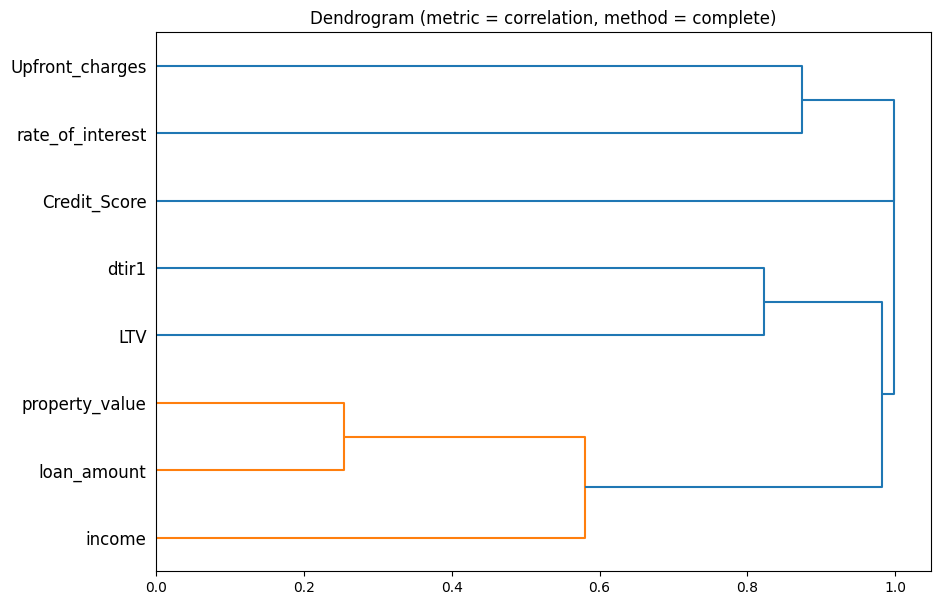

In [19]:
from scipy.spatial.distance import squareform, pdist
from ModelingTools.FeatureEngineer.transformers import plot_feature_dendrogram

numeric_cols = tuvct.get_numeric_cols()

def distance_1_corr(m):
    # penalize for correlation > 1, make sure this distance is always < 1
    return 1 - np.abs(1 - pdist(m, metric = 'correlation'))

plot_feature_dendrogram(
    X_train[numeric_cols].dropna(),
    distance_func = distance_1_corr, 
    metric = 'correlation',
    method = 'complete'
)

# 3. Feature Engineering

## 3.1 Feature Selection

https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

### 3.1.1 Filter method - Univariate Feature Selection

numerical features: select features with top 2 anova_f score with target within each group (using agglomerative clustering)
categorical features: select top 80% of features with highest mutual info score with target

In [20]:
from functools import partial
from sklearn.cluster import AgglomerativeClustering
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif, mutual_info_classif, SelectPercentile
from category_encoders.ordinal import OrdinalEncoder
from ModelingTools.FeatureEngineer.transformers import MyImputer, MyFeatureSelector, SelectKBestByCluster, SelectThreshold, NamedTransformer
from ModelingTools.utils.support import make_present_col_selector

# use MyFeatureSelector as it support pre-processing on features
num_selector = MyFeatureSelector(
    # selector criteria
    selector = SelectKBestByCluster(
        k = 2,  # select top 2 within each cluster
        # score is defined using Anova-F
        scorer = SelectThreshold(
            score_func = f_classif, # use Anova-F as score metric
            threshold = 0.05,  # 95% significant level
            use_p = True, # use p-value instead of F score to filter
        ),
        # cluster is defined using agglomerative clustering
        cluster_kernal = AgglomerativeClustering(
            n_clusters = None, # as we will set distance threshold
            affinity = 'precomputed', # use precomputed scores
            linkage = 'complete', # complete linkage
            distance_threshold = 0.7, # based on dendrogram above 
            compute_full_tree = True
        ),
        distance_func = distance_1_corr # defined above
        
    ),
    # preprocessing steps
    preprocess_pipe = MyImputer(strategy = 'median')
)

# categorical
categ_selector = MyFeatureSelector(
    selector = SelectPercentile(
        # use mutual info for categ features as filtering metric
        score_func = partial(
            mutual_info_classif,
            discrete_features = True,
        ),
        percentile = 50  # keep top 50% of features
    ),
    # use ordinal encoding as it meets the mutual_info_classif API request
    preprocess_pipe = Pipeline([
        ('impute', MyImputer(
            strategy='constant',
            fill_value='Other'
        )),
        ('ordinal', OrdinalEncoder(
            handle_unknown='value', 
            handle_missing='value'
        ))
    ])
)

num_cols = tuvct.get_numeric_cols()
categ_cols = tuvct.get_categ_cols()
# use NamedTransformer wrapper to keep column name
feature_selector_filter = NamedTransformer(
    ColumnTransformer(
        transformers = [
            ('numeric', num_selector, make_present_col_selector(num_cols)),
            ('categorical', categ_selector, make_present_col_selector(categ_cols))
        ],
        remainder = 'drop'
    )
)

feature_selector_filter.fit(X_train, y_train)

NamedTransformer(transformer=ColumnTransformer(transformers=[('numeric',
                                                              MyFeatureSelector(preprocess_pipe=MyImputer(strategy='median'),
                                                                                selector=SelectKBestByCluster(cluster_kernal=AgglomerativeClustering(affinity='precomputed',
                                                                                                                                                     compute_full_tree=True,
                                                                                                                                                     distance_threshold=0.7,
                                                                                                                                                     linkage='complete',
                                                                                                                                                     n_clusters=None),
                                                                                                              distance_func=<function distance_1_corr at 0...
                                                              functools.partial(<function _select_present_subset at 0x7fb5de350280>, ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']))]))

selected features

In [21]:
feature_selector_filter.get_feature_names_out()

array(['loan_amount', 'income', 'dtir1', 'Upfront_charges', 'LTV',
       'rate_of_interest', 'Gender', 'loan_type',
       'business_or_commercial', 'term', 'Neg_ammortization',
       'lump_sum_payment', 'credit_type', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'Region'], dtype='<U25')

inspect: numerical features and their pvalues of F-test and the cluster it belongs to

In [22]:
cluster_selector_ = feature_selector_filter.transformer.named_transformers_['numeric'].selector_
cluster_selector_.feature_score_cluster_

,Scores,Cluster
loan_amount,1.327904e-36,0
rate_of_interest,2.189080e-50,4
Upfront_charges,2.964357e-203,2
property_value,1.685263e-154,0
income,6.057322e-88,0
LTV,1.531380e-31,3
dtir1,2.079877e-162,1


inspect: categorical features and their mutual info score

In [23]:
categ_selector_ = feature_selector_filter.transformer.named_transformers_['categorical'].selector_
#pd.Series(categ_selector_.scores_, index = categ_selector_.feature_names_in_).sort_values(ascending=False)
pd.DataFrame({
        'mutual_info_score' : categ_selector_.scores_,
        'selected': np.isin(
            categ_selector_.feature_names_in_,
            feature_selector_filter.get_feature_names_out()
        )
    },
    index = categ_selector_.feature_names_in_
).sort_values(ascending=False, by = 'mutual_info_score')


,mutual_info_score,selected
credit_type,0.163321,True
lump_sum_payment,0.013590,True
Neg_ammortization,0.010781,True
co-applicant_credit_type,0.010593,True
submission_of_application,0.009286,True
term,0.004866,True
loan_type,0.004111,True
business_or_commercial,0.004005,True
Gender,0.003693,True
age,0.003137,True


### 3.1.2 Wrapper Method (recursive feature elimination)

In [24]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from category_encoders import CountEncoder

rfe = RFECV(
    # use random forest as base filter
    estimator = RandomForestClassifier(n_estimators = 200, n_jobs = -1),
    min_features_to_select = 15,  # keep 50% of features
    scoring = 'average_precision', # we care about precision-recall
    importance_getter = 'auto', # will use feature importance
    cv = 3, # use 3-fold cross validation
    #n_jobs = -1,
    #verbose = 3,
)

feature_selector_wrapper = MyFeatureSelector(
    selector = rfe,
    # need to preprocess feature before feeding into the selector
    preprocess_pipe = NamedTransformer(
        ColumnTransformer(
            transformers = [
                (
                    'numeric', 
                    MyImputer(strategy = 'median'), 
                    make_present_col_selector(num_cols)
                ),
                (
                    'categorical', 
                    Pipeline([
                        ('impute', MyImputer(
                            strategy='constant',
                            fill_value='Other'
                        )),
                        ('count', CountEncoder(
                            min_group_size=0.05, 
                            handle_unknown='value'
                        ))
                    ]), 
                    make_present_col_selector(categ_cols)
                )
            ],
            remainder = 'drop'
        )
    )
)
feature_selector_wrapper.fit(X_train, y_train)

MyFeatureSelector(preprocess_pipe=NamedTransformer(transformer=ColumnTransformer(transformers=[('numeric',
                                                                                                MyImputer(strategy='median'),
                                                                                                functools.partial(<function _select_present_subset at 0x7fb5de350280>, ['loan_amount', 'rate_of_interest', 'Upfront_charges', 'property_value', 'income', 'Credit_Score', 'LTV', 'dtir1'])),
                                                                                               ('categorical',
                                                                                                Pipeline(steps=[('imput...
                                                                                                functools.partial(<function _select_present_subset at 0x7fb5de350280>, ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']))])),
                  selector=RFECV(cv=3,
                                 estimator=RandomForestClassifier(n_estimators=200,
                                                                  n_jobs=-1),
                                 min_features_to_select=15,
                                 scoring='average_precision'))

In [25]:
feature_selector_wrapper.get_feature_names_out()

array(['loan_amount', 'rate_of_interest', 'Upfront_charges',
       'property_value', 'income', 'Credit_Score', 'LTV', 'dtir1',
       'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'occupancy_type',
       'Secured_by', 'total_units', 'credit_type',
       'co-applicant_credit_type', 'age', 'submission_of_application',
       'Region', 'Security_Type'], dtype=object)

In [26]:
pd.DataFrame(feature_selector_wrapper.selector_.cv_results_)

,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score
0,0.997378,0.000244,0.997193,0.997724,0.997218
1,0.997423,0.000460,0.996905,0.998023,0.997341
2,0.997511,0.000373,0.997249,0.998039,0.997246
3,0.997306,0.000604,0.997025,0.998145,0.996747
4,0.997545,0.000463,0.997030,0.998153,0.997451
5,0.997589,0.000413,0.997330,0.998172,0.997264
6,0.997610,0.000426,0.997277,0.998211,0.997341
7,0.997824,0.000367,0.997703,0.998321,0.997447
8,0.997753,0.000333,0.997529,0.998223,0.997507
9,0.997853,0.000348,0.997807,0.998300,0.997451


In [27]:
pd.Series(
    feature_selector_wrapper.selector_.ranking_, 
    feature_selector_wrapper.selector_.feature_names_in_
).sort_values()

loan_amount                  1
submission_of_application    1
age                          1
co-applicant_credit_type     1
credit_type                  1
total_units                  1
Secured_by                   1
occupancy_type               1
lump_sum_payment             1
interest_only                1
Neg_ammortization            1
term                         1
business_or_commercial       1
Region                       1
open_credit                  1
loan_purpose                 1
loan_type                    1
approv_in_adv                1
Gender                       1
loan_limit                   1
dtir1                        1
LTV                          1
Credit_Score                 1
income                       1
property_value               1
Upfront_charges              1
rate_of_interest             1
Credit_Worthiness            1
Security_Type                1
construction_type            2
dtype: int64

### 3.1.3 Embedded Method (Lasso Feature Selection)

In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import RobustScaler, StandardScaler
from ModelingTools.FeatureEngineer.transformers import OutlierClipper

emb = SelectFromModel(
    # use random forest as base filter
    estimator = LogisticRegressionCV(
        penalty = 'l1',  # use L1 - Lasso to suppress coefficients
        solver = 'saga',
        scoring = 'average_precision', # we care about precision-recall
        n_jobs = -1,
        #verbose = 3,
        cv = 3
    ),
    threshold='median', # select feature whose score > median of all scores across features
    importance_getter = 'auto' # use absolute coefficient (normalized X) as selection criteria
)

feature_selector_embed = MyFeatureSelector(
    selector = emb,
    # need to preprocess feature before feeding into the selector
    preprocess_pipe = NamedTransformer(
        ColumnTransformer(
            transformers = [
                (
                    'numeric',
                    Pipeline([
                        ('outlier', OutlierClipper(strategy='iqr')),
                        ('impute', MyImputer(strategy = 'median')),
                        ('scale', StandardScaler())
                    ]),
                    make_present_col_selector(num_cols)
                ),
                (
                    'categorical', 
                    Pipeline([
                        ('impute', MyImputer(
                            strategy='constant',
                            fill_value='Other'
                        )),
                        ('ordinal', CountEncoder(
                            min_group_size=0.05, 
                            handle_unknown='value',
                            normalize=False
                        )),
                        ('scale', StandardScaler())
                    ]), 
                    make_present_col_selector(categ_cols)
                )
            ],
            remainder = 'drop'
        )
    )
)
feature_selector_embed.fit(X_train, y_train)

MyFeatureSelector(preprocess_pipe=NamedTransformer(transformer=ColumnTransformer(transformers=[('numeric',
                                                                                                Pipeline(steps=[('outlier',
                                                                                                                 OutlierClipper()),
                                                                                                                ('impute',
                                                                                                                 MyImputer(strategy='median')),
                                                                                                                ('scale',
                                                                                                                 StandardScaler())]),
                                                                                                functools.partial(<function _select_present_subset at 0x7fb5de350280>, ['loan_amount', 'rate_of_interest', 'Upfront_charges', 'property_v...
                                                                                                functools.partial(<function _select_present_subset at 0x7fb5de350280>, ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']))])),
                  selector=SelectFromModel(estimator=LogisticRegressionCV(cv=3,
                                                                          n_jobs=-1,
                                                                          penalty='l1',
                                                                          scoring='average_precision',
                                                                          solver='saga'),
                                           threshold='median'))

In [29]:
feature_selector_embed.get_feature_names_out()

array(['loan_amount', 'rate_of_interest', 'Upfront_charges',
       'property_value', 'income', 'LTV', 'loan_limit', 'loan_type',
       'business_or_commercial', 'Neg_ammortization', 'lump_sum_payment',
       'occupancy_type', 'total_units', 'credit_type',
       'submission_of_application'], dtype=object)

In [30]:
lr_ = feature_selector_embed.selector_.estimator_
pd.DataFrame({
        'coef' : lr_.coef_[0],
        'selected' : np.isin(
            lr_.feature_names_in_, 
            feature_selector_embed.get_feature_names_out()
        )
    },
    index = lr_.feature_names_in_
).sort_values(by = 'coef')

,coef,selected
credit_type,-1.594615,True
income,-0.508005,True
Upfront_charges,-0.430541,True
rate_of_interest,-0.377263,True
lump_sum_payment,-0.376155,True
Neg_ammortization,-0.369020,True
business_or_commercial,-0.305153,True
occupancy_type,-0.298426,True
loan_limit,-0.182469,True
total_units,-0.106634,True


### 3.1.4 Combining 3 feature selection method results

use 0/1 boolean flag by each method

In [31]:
select_result = pd.DataFrame({
        'filter' : X_train.columns.isin(feature_selector_filter.get_feature_names_out()),
        'wrapper' : X_train.columns.isin(feature_selector_wrapper.get_feature_names_out()),
        'embed' : X_train.columns.isin(feature_selector_embed.get_feature_names_out())
    },
    index = X_train.columns    
).astype('int')
select_result.style.background_gradient()

,filter,wrapper,embed
loan_limit,0,1,1
Gender,1,1,0
approv_in_adv,0,1,0
loan_type,1,1,1
loan_purpose,0,1,0
Credit_Worthiness,0,1,0
open_credit,0,1,0
business_or_commercial,1,1,1
loan_amount,1,1,1
rate_of_interest,1,1,1


In [32]:
select_result.sum(axis = 1)[select_result.sum(axis = 1) == 3].index

Index(['loan_type', 'business_or_commercial', 'loan_amount',
       'rate_of_interest', 'Upfront_charges', 'Neg_ammortization',
       'lump_sum_payment', 'income', 'credit_type',
       'submission_of_application', 'LTV'],
      dtype='object')

use ranking as soft selection criterion

In [33]:
def get_ranking(scores: pd.Series, columns: list, higher_is_better:bool = True):
    r = pd.Series(index = columns, dtype = 'float')
    r[scores.index] = scores.rank(ascending= not higher_is_better)
    return r.fillna(r.max() + 1).astype('int')


filter_ranking = get_ranking(
    feature_selector_filter.transformer.named_transformers_['numeric'].selector_.selected_feature_score_cluster_['Scores'],
    higher_is_better = False,
    columns = X_train.columns
)
wrapper_ranking = pd.Series(
    feature_selector_wrapper.selector_.ranking_, 
    feature_selector_wrapper.selector_.feature_names_in_
)
embed_ranking = get_ranking(
    pd.Series(
        np.abs(feature_selector_embed.selector_.estimator_.coef_[0]),
        index = feature_selector_embed.selector_.estimator_.feature_names_in_
    ),
    higher_is_better = True,
    columns = X_train.columns
)

select_ranking = pd.merge(
    filter_ranking.rename('filter'),
    wrapper_ranking.rename('wrapper'),
    left_index = True,
    right_index = True,
    how = 'outer'
).merge(
    embed_ranking.rename('embed'),
    left_index = True,
    right_index = True,
    how = 'outer'
)

(
    select_ranking.style
    .background_gradient(subset = ['filter'])
    .background_gradient(subset = ['wrapper'])
    .background_gradient(subset = ['embed'])
)


,filter,wrapper,embed
Credit_Score,7,1,27
Credit_Worthiness,7,1,16
Gender,7,1,26
LTV,6,1,9
Neg_ammortization,7,1,8
Region,7,1,17
Secured_by,7,1,23
Security_Type,7,1,23
Upfront_charges,1,1,4
age,7,1,30


In [34]:
select_ranking.sum(axis = 1).sort_values()[:11].index # select top 11 features

Index(['Upfront_charges', 'income', 'credit_type', 'submission_of_application',
       'rate_of_interest', 'lump_sum_payment', 'loan_type', 'LTV',
       'Neg_ammortization', 'business_or_commercial', 'occupancy_type'],
      dtype='object')

merge the two results

In [35]:
bool_select_cols = select_result.sum(axis = 1)[select_result.sum(axis = 1) == 3].index
rank_select_cols = select_ranking.sum(axis = 1).sort_values()[:11].index
selected_cols = bool_select_cols.intersection(rank_select_cols)
selected_cols

Index(['loan_type', 'business_or_commercial', 'rate_of_interest',
       'Upfront_charges', 'Neg_ammortization', 'lump_sum_payment', 'income',
       'credit_type', 'submission_of_application', 'LTV'],
      dtype='object')

### 3.1.5 Build a preselector for pipeline

In [36]:
from ModelingTools.FeatureEngineer.transformers import PreSelectSelector

fsel_pipe = PreSelectSelector(
    pre_selected_features = selected_cols
)
fsel_pipe.fit_transform(X_train, y_train)

,loan_type,business_or_commercial,rate_of_interest,Upfront_charges,Neg_ammortization,lump_sum_payment,income,credit_type,submission_of_application,LTV
0,type1,nob/c,4.250,18410.00,not_neg,not_lpsm,13560.0,EXP,to_inst,79.505076
1,type1,nob/c,4.375,4115.46,not_neg,not_lpsm,10500.0,CIB,to_inst,55.022321
2,type2,b/c,NaN,NaN,not_neg,not_lpsm,1860.0,CIB,to_inst,91.015625
3,type1,nob/c,3.625,14160.31,not_neg,not_lpsm,8940.0,CIB,to_inst,78.882576
4,type1,nob/c,3.690,7392.04,not_neg,not_lpsm,4200.0,CIB,not_inst,70.933014
...,...,...,...,...,...,...,...,...,...,...
104064,type1,nob/c,3.750,6794.00,not_neg,not_lpsm,5400.0,CRIF,not_inst,40.384615
104065,type1,nob/c,3.750,1250.00,not_neg,not_lpsm,6300.0,CIB,to_inst,74.038462
104066,type3,nob/c,3.500,1382.80,not_neg,not_lpsm,NaN,EXP,to_inst,91.666667
104067,type1,nob/c,3.625,0.00,not_neg,not_lpsm,11340.0,CIB,not_inst,57.657285


## 3.2 Feature Preprocessing

In [37]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, FunctionTransformer
from sklearn.base import clone
from ModelingTools.FeatureEngineer.transformers import NamedTransformer, BucketCategByFsel, BucketCategValue, OutlierClipper, MyImputer
from ModelingTools.Explore.profiling import log10pc, exp10pc

num_cols = tuvct.get_numeric_cols()
num_log_cols = ['Upfront_charges', 'income']
num_non_log_cols = list(set(num_cols) - set(num_log_cols))
categ_cols = tuvct.get_categ_cols()

categ_pipe = Pipeline([
    ('impute', MyImputer(
        strategy='constant', 
        fill_value='Missing'
    )),
    #('combine_categ', BucketCategValue(threshold=0.9, handle_unknown='ignore')),
    ('ohe', NamedTransformer(
        OneHotEncoder(
            sparse=False, 
            handle_unknown='ignore'
        )
    ))
])

num_log_pipe = Pipeline([
    ('outlier', OutlierClipper(strategy='iqr')),
    ('impute', MyImputer(strategy='median')),
    ('log', NamedTransformer(
        FunctionTransformer(
            func = log10pc, 
            inverse_func = exp10pc
        )
    )),
    ('scale', StandardScaler())
])

num_non_log_pipe = Pipeline([
    ('outlier', OutlierClipper(strategy='iqr')),
    ('impute', MyImputer(strategy='median')),
    ('scale', RobustScaler())
])

preprocessing_pipe = NamedTransformer(
    ColumnTransformer(
        transformers = [
            ('categ', categ_pipe, make_present_col_selector(categ_cols)),
            ('numeric_log', num_log_pipe, make_present_col_selector(num_log_cols)),
            ('numeric_non_log', num_non_log_pipe, make_present_col_selector(num_non_log_cols))
        ],
        remainder = 'drop'
    )
)
preprocessing_pipe.fit(fsel_pipe.fit_transform(X_train, y_train), y_train)

NamedTransformer(transformer=ColumnTransformer(transformers=[('categ',
                                                              Pipeline(steps=[('impute',
                                                                               MyImputer(fill_value='Missing',
                                                                                         strategy='constant')),
                                                                              ('ohe',
                                                                               NamedTransformer(transformer=OneHotEncoder(handle_unknown='ignore',
                                                                                                                          sparse=False)))]),
                                                              functools.partial(<function _select_present_subset at 0x7fb5de350280>, ['loan_limit', 'Gender', 'approv_in_adv', 'lo...
                                                              functools.partial(<function _select_present_subset at 0x7fb5de350280>, ['Upfront_charges', 'income'])),
                                                             ('numeric_non_log',
                                                              Pipeline(steps=[('outlier',
                                                                               OutlierClipper()),
                                                                              ('impute',
                                                                               MyImputer(strategy='median')),
                                                                              ('scale',
                                                                               RobustScaler())]),
                                                              functools.partial(<function _select_present_subset at 0x7fb5de350280>, ['property_value', 'dtir1', 'Credit_Score', 'loan_amount', 'LTV', 'rate_of_interest']))]))

In [38]:
preprocessing_pipe.transform(fsel_pipe.transform(X_train))

,loan_type_type1,loan_type_type2,loan_type_type3,business_or_commercial_b/c,business_or_commercial_nob/c,Neg_ammortization_Missing,Neg_ammortization_neg_amm,Neg_ammortization_not_neg,lump_sum_payment_lpsm,lump_sum_payment_not_lpsm,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,submission_of_application_Missing,submission_of_application_not_inst,submission_of_application_to_inst,Upfront_charges,income,rate_of_interest,LTV
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.888717,0.966933,0.52,0.204496
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.538824,0.708783,0.77,-0.937911
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.377667,-1.037969,0.00,0.741598
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.888717,0.546436,-0.73,0.175449
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.744367,-0.216046,-0.60,-0.195491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104064,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.714757,0.037596,-0.48,-1.620932
104065,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.120730,0.193181,-0.48,-0.050585
104066,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.156145,0.102735,-0.98,0.771977
104067,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-2.382706,0.786466,-0.73,-0.814959


# 4. Model training

## 4.1 Hyperparameter Tuning

In [39]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(
    objective='binary', 
    n_estimators=50, 
    boosting_type='gbdt', 
    importance_type='gain',
    #class_weight='balanced'
)

model_pipeline = Pipeline([
    ('fsel', fsel_pipe),
    ('preprocess', preprocessing_pipe),
    ('model', model)
])

In [40]:
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import MedianPruner
from optuna.distributions import FloatDistribution, IntDistribution, CategoricalDistribution
from optuna.integration import OptunaSearchCV

optuna_storage = "sqlite:////home/luntaixia/Downloads/demo_optuna_tuning.db"
study_name = "loan-default-modeling"

study = optuna.create_study(
    storage = optuna_storage,
    study_name = study_name,
    pruner = MedianPruner(),
    direction = 'maximize',
    sampler = TPESampler(),
    load_if_exists = True
)

hyper_tuner = OptunaSearchCV(
    estimator = model_pipeline,
    param_distributions={
        # preprocessing parameter
        'preprocess__transformer__numeric_log__impute__strategy': CategoricalDistribution(choices=['mean', 'median']),
        # boosting regularization
        'model__learning_rate': FloatDistribution(0.001, 0.35, log=True),
        'model__reg_alpha': FloatDistribution(1e-6, 1e2, log=True),  # l1
        'model__reg_lambda': FloatDistribution(1e-6, 1e2, log=True),  # l2
        # tree regularization
        'model__max_depth': IntDistribution(3, 12, step=3),
        'model__num_leaves': IntDistribution(20, 100, step=10),
        'model__min_split_gain': FloatDistribution(1e-3, 1e2, log=True),  # min_split_loss
        'model__subsample': FloatDistribution(0.3, 1, step=0.1),
        'model__min_child_weight': IntDistribution(1, 20),
        'model__colsample_bytree': FloatDistribution(0.3, 1, step=0.1),
    },
    cv = 3, # 3-fold cross validation
    error_score = 'raise',
    n_trials = 50,
    refit = True,
    return_train_score = True,
    scoring = 'average_precision',
    study = study,
    verbose = 3,
)
hyper_tuner.fit(X_train, y_train)

/home/luntaixia/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-09-17 22:42:35,012] A new study created in RDB with name: loan-default-modeling
/tmp/ipykernel_43885/4121780963.py:19: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  hyper_tuner = OptunaSearchCV(
[I 2023-09-17 22:42:35,033] Searching the best hyperparameters using 104069 samples...
[I 2023-09-17 22:42:36,198] Trial 0 finished with value: 0.9978614172258164 and parameters: {'preprocess__transformer__numeric_log__impute__strategy': 'mean', 'model__learning_rate': 0.21544641037116063, 'model__reg_alpha': 0.0001823761075559414, 'model__reg_lambda': 0.0003117696260974878, 'model__max_depth': 3, 'model__num_leaves': 50, 'model__min_split_gain': 0.0434741077

OptunaSearchCV(cv=3, error_score='raise',
               estimator=Pipeline(steps=[('fsel',
                                          PreSelectSelector(pre_selected_features=Index(['loan_type', 'business_or_commercial', 'rate_of_interest',
       'Upfront_charges', 'Neg_ammortization', 'lump_sum_payment', 'income',
       'credit_type', 'submission_of_application', 'LTV'],
      dtype='object'))),
                                         ('preprocess',
                                          NamedTransformer(transform...
                                    'model__reg_lambda': FloatDistribution(high=100.0, log=True, low=1e-06, step=None),
                                    'model__subsample': FloatDistribution(high=1.0, log=False, low=0.3, step=0.1),
                                    'preprocess__transformer__numeric_log__impute__strategy': CategoricalDistribution(choices=('mean', 'median'))},
               return_train_score=True, scoring='average_precision',
               study=<optuna.study.study.Study object at 0x7fb5decbc0a0>,
               verbose=3)

In [ ]:
# start optuna dashboard
optuna-dashboard sqlite:////home/luntaixia/Downloads/demo_optuna_tuning.db

In [41]:
hyper_tuner.best_params_

{'model__colsample_bytree': 0.6000000000000001,
 'model__learning_rate': 0.09740240532011535,
 'model__max_depth': 6,
 'model__min_child_weight': 1,
 'model__min_split_gain': 0.10741114983215326,
 'model__num_leaves': 80,
 'model__reg_alpha': 3.2780277150607416e-06,
 'model__reg_lambda': 0.040910672101081416,
 'model__subsample': 0.4,
 'preprocess__transformer__numeric_log__impute__strategy': 'median'}

In [42]:
hyper_tuner.study_.trials_dataframe(attrs = ['value', 'params']).sort_values(by = 'value', ascending = False)

,value,params_model__colsample_bytree,params_model__learning_rate,params_model__max_depth,params_model__min_child_weight,params_model__min_split_gain,params_model__num_leaves,params_model__reg_alpha,params_model__reg_lambda,params_model__subsample,params_preprocess__transformer__numeric_log__impute__strategy
35,0.998354,0.6,0.097402,6,1,0.107411,80,0.000003,0.040911,0.4,median
42,0.998349,0.6,0.122606,6,2,0.173916,70,0.000075,0.029937,0.4,median
36,0.998334,0.6,0.108438,6,1,0.144594,60,0.000031,0.000282,0.4,mean
43,0.998323,0.6,0.248108,6,2,0.186282,70,0.000033,0.035441,0.3,median
34,0.998320,0.6,0.102698,6,4,0.118543,80,0.000054,0.369576,0.4,median
46,0.998306,0.4,0.243134,6,1,0.243579,40,0.004344,0.150769,0.3,median
44,0.998300,0.5,0.131432,6,2,0.153788,70,0.000003,0.028345,0.3,mean
13,0.998300,0.6,0.315221,12,14,1.246073,80,0.000037,0.011429,0.4,median
32,0.998294,0.8,0.095480,9,8,0.024930,80,0.000083,0.898712,0.5,median
47,0.998285,0.7,0.136762,6,3,0.452462,70,0.000002,0.005249,0.4,median


## 4.2 Model Calibration (binary classification model)

In [43]:
from sklearn.calibration import CalibratedClassifierCV, IsotonicRegression

calib = CalibratedClassifierCV(
    base_estimator = hyper_tuner.best_estimator_,
    method = 'isotonic',  # use isotonic regression for non-parametric approach
    cv = 'prefit',
)
calib.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=Pipeline(steps=[('fsel',
                                                       PreSelectSelector(pre_selected_features=Index(['loan_type', 'business_or_commercial', 'rate_of_interest',
       'Upfront_charges', 'Neg_ammortization', 'lump_sum_payment', 'income',
       'credit_type', 'submission_of_application', 'LTV'],
      dtype='object'))),
                                                      ('preprocess',
                                                       NamedTransformer(transformer=ColumnTra...
                                                                                                                     functools.partial(<function _select_present_subset at 0x7fb5de350280>, ['property_value', 'dtir1', 'Credit_Score', 'loan_amount', 'LTV', 'rate_of_interest']))]))),
                                                      ('model',
                                                       LGBMClassifier(colsample_bytree=0.6000000000000001,
                                                                      importance_type='gain',
                                                                      learning_rate=0.09740240532011535,
                                                                      max_depth=6,
                                                                      min_child_weight=1,
                                                                      min_split_gain=0.10741114983215326,
                                                                      n_estimators=50,
                                                                      num_leaves=80,
                                                                      objective='binary',
                                                                      reg_alpha=3.2780277150607416e-06,
                                                                      reg_lambda=0.040910672101081416,
                                                                      subsample=0.4))]),
                       cv='prefit', method='isotonic')

In [44]:
from sklearn.calibration import calibration_curve
from ModelingTools.Evaluation.plots import chart_calibration_curve

prob_true_train, prob_pred_train = calibration_curve(
    y_true = y_train, 
    y_prob = calib.predict_proba(X_train)[:,1], 
    normalize=False, 
    n_bins=25, 
    strategy='uniform'
)
prob_true_test, prob_pred_test = calibration_curve(
    y_true = y_test, 
    y_prob = calib.predict_proba(X_test)[:,1], 
    normalize=False, 
    n_bins=25, 
    strategy='uniform'
)

fig = chart_calibration_curve(
    cali_curves={
        'train' : {
            'prob_true': prob_true_train.tolist(),
            'prob_pred': prob_pred_train.tolist(),
        },
        'test' : {
            'prob_true': prob_true_test.tolist(),
            'prob_pred': prob_pred_test.tolist(),
        }
    },
    size = (600, 300)
)
show(fig)

In [45]:
from joblib import dump

dump(calib, filename='/media/sf_iphone/credit-modeling.joblib')

['/media/sf_iphone/credit-modeling.joblib']

# 5. Model Evaluation

In [46]:
from joblib import load

modeling = load('/media/sf_iphone/credit-modeling.joblib')

In [47]:
from sklearn.metrics import classification_report

r = classification_report(
    y_true = y_test.values,
    y_pred = modeling.predict(X_test),
)
print(r)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33609
           1       0.99      1.00      1.00     10992

    accuracy                           1.00     44601
   macro avg       1.00      1.00      1.00     44601
weighted avg       1.00      1.00      1.00     44601



In [48]:
from sklearn.metrics import roc_auc_score, average_precision_score

y_prob = modeling.predict_proba(X_test)[:,1]
print(
    roc_auc_score(y_test.values, y_prob), 
    average_precision_score(y_test.values, y_prob)
)

0.9995414004241691 0.9981662871628763


In [49]:
from ModelingTools.Evaluation.metrics import binary_clf_metric_at_thresholds

binary_metrics_train = binary_clf_metric_at_thresholds(y_train, modeling.predict_proba(X_train)[:,1])
binary_metrics_test = binary_clf_metric_at_thresholds(y_test, modeling.predict_proba(X_test)[:,1])

In [50]:
from ModelingTools.Evaluation.plots import chart_roc_curve

fig = chart_roc_curve(
    binary_metrics_train,
    binary_metrics_test,
    names = ['train', 'test']
)
show(fig)

In [51]:
from ModelingTools.Evaluation.plots import chart_pr_curve

fig = chart_pr_curve(
    binary_metrics_train,
    binary_metrics_test,
    names = ['train', 'test']
)
show(fig)

In [52]:
from ModelingTools.Evaluation.plots import chart_confusion_maxtrix

fig = chart_confusion_maxtrix(metrics = binary_metrics_test,)
show(fig)

# 6. Model Interpretation

## 6.1 Feature Importance

In [71]:
from ModelingTools.Explore.plots import chart_barchart

importance_chart = chart_barchart(
    pd.Series(
        modeling.base_estimator['model'].feature_importances_,
        index = modeling.base_estimator['preprocess'].get_feature_names_out()
    ).sort_values(ascending = False),
    max_bar=50,
    size = (900, 600),
    title="Feature Importances by Feature"
)
show(importance_chart)

## 6.2 Shap Interpretation

https://www.depends-on-the-definition.com/shapley-values-from-scratch/

In [53]:
X_train_premodel = modeling.base_estimator[:-1].transform(X_train)
X_test_premodel = modeling.base_estimator[:-1].transform(X_test)
X_train_premodel

,loan_type_type1,loan_type_type2,loan_type_type3,business_or_commercial_b/c,business_or_commercial_nob/c,Neg_ammortization_Missing,Neg_ammortization_neg_amm,Neg_ammortization_not_neg,lump_sum_payment_lpsm,lump_sum_payment_not_lpsm,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,submission_of_application_Missing,submission_of_application_not_inst,submission_of_application_to_inst,Upfront_charges,income,rate_of_interest,LTV
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.888717,0.966933,0.52,0.204496
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.538824,0.708783,0.77,-0.937911
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.377667,-1.037969,0.00,0.741598
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.888717,0.546436,-0.73,0.175449
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.744367,-0.216046,-0.60,-0.195491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104064,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.714757,0.037596,-0.48,-1.620932
104065,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.120730,0.193181,-0.48,-0.050585
104066,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.156145,0.102735,-0.98,0.771977
104067,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-2.382706,0.786466,-0.73,-0.814959


In [54]:
import shap

explainer = shap.TreeExplainer(
    model = modeling.base_estimator['model'],
    data = X_train_premodel, # specify this
    model_output = 'probability'  # explain the output of the model transformed into probability space 
    # (note that this means the SHAP values now sum to the probability output of the model)
)
shap_values = explainer.shap_values(X_train_premodel)
shap_values

 99%|===================| 102753/104069 [00:52<00:00]        

array([[-3.33594776e-04, -1.53773427e-04,  0.00000000e+00, ...,
        -2.37828696e-03, -1.24632678e-01, -4.68520008e-03],
       [-3.34437655e-04, -1.69319666e-04,  0.00000000e+00, ...,
        -2.70093277e-03, -1.23150058e-01, -6.09140821e-03],
       [ 4.22105727e-03,  3.71507731e-03,  0.00000000e+00, ...,
         1.43667879e-02,  2.69942278e-01,  6.35455187e-03],
       ...,
       [ 7.83277151e-04, -8.14972310e-05, -7.10730022e-05, ...,
        -3.40824894e-03, -1.22407885e-01, -2.53028211e-03],
       [-2.08490307e-04, -1.50250296e-04,  0.00000000e+00, ...,
        -3.13678973e-03, -1.21367010e-01, -4.85710547e-03],
       [ 1.03436583e-03, -9.23855388e-05, -3.91868296e-05, ...,
        -3.77298935e-03, -1.20371111e-01, -3.62019504e-03]])

In [55]:
exps = explainer(X_train_premodel)
exps  # support indexing for specific sample

 99%|===================| 103479/104069 [01:04<00:00]        

.values =
array([[-3.33594776e-04, -1.53773427e-04,  0.00000000e+00, ...,
        -2.37828696e-03, -1.24632678e-01, -4.68520008e-03],
       [-3.34437655e-04, -1.69319666e-04,  0.00000000e+00, ...,
        -2.70093277e-03, -1.23150058e-01, -6.09140821e-03],
       [ 4.22105727e-03,  3.71507731e-03,  0.00000000e+00, ...,
         1.43667879e-02,  2.69942278e-01,  6.35455187e-03],
       ...,
       [ 7.83277151e-04, -8.14972310e-05, -7.10730022e-05, ...,
        -3.40824894e-03, -1.22407885e-01, -2.53028211e-03],
       [-2.08490307e-04, -1.50250296e-04,  0.00000000e+00, ...,
        -3.13678973e-03, -1.21367010e-01, -4.85710547e-03],
       [ 1.03436583e-03, -9.23855388e-05, -3.91868296e-05, ...,
        -3.77298935e-03, -1.20371111e-01, -3.62019504e-03]])

.base_values =
array([0.31629985, 0.31629985, 0.31629985, ..., 0.31629985, 0.31629985,
       0.31629985])

.data =
array([[ 1.        ,  0.        ,  0.        , ...,  0.96693324,
         0.52      ,  0.20449628],
       [ 1.     

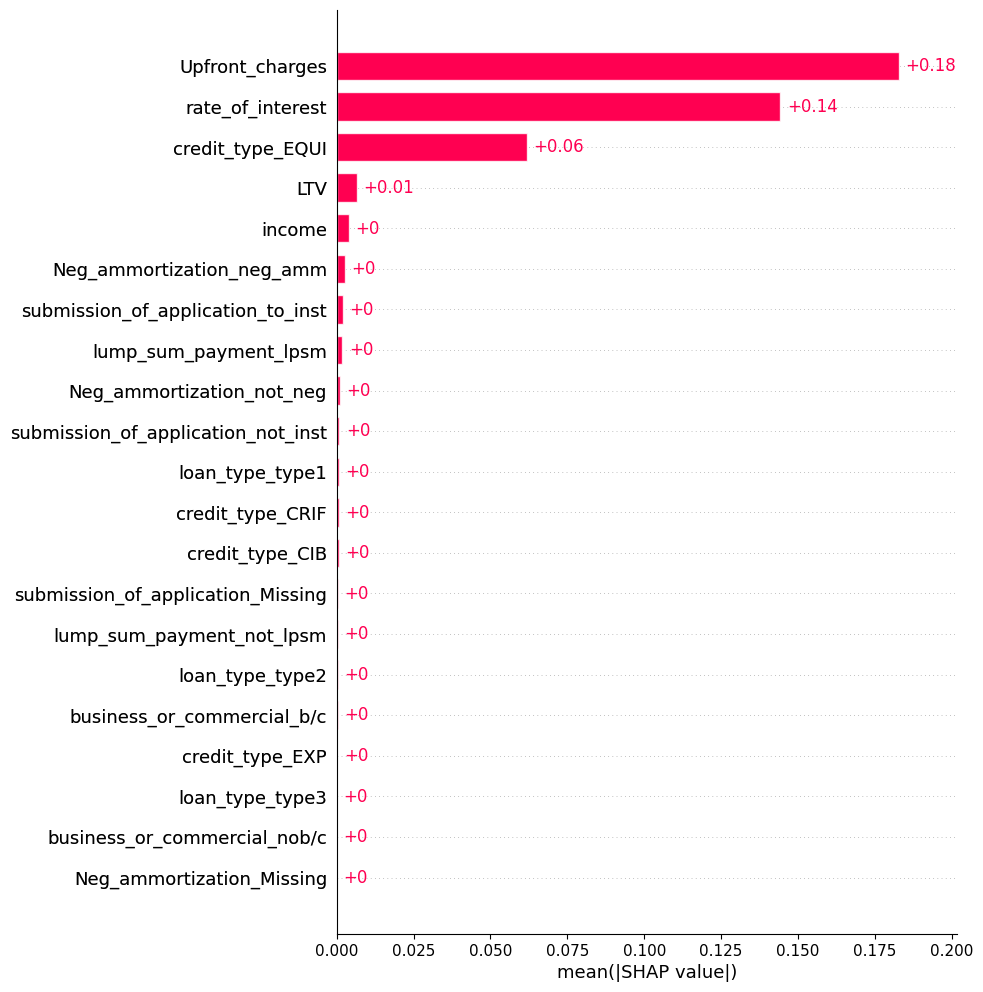

In [59]:
# global level feature importance
# shap.summary_plot(shap_values, X_train_premodel, plot_type='bar')
shap.plots.bar(exps, max_display = 50)

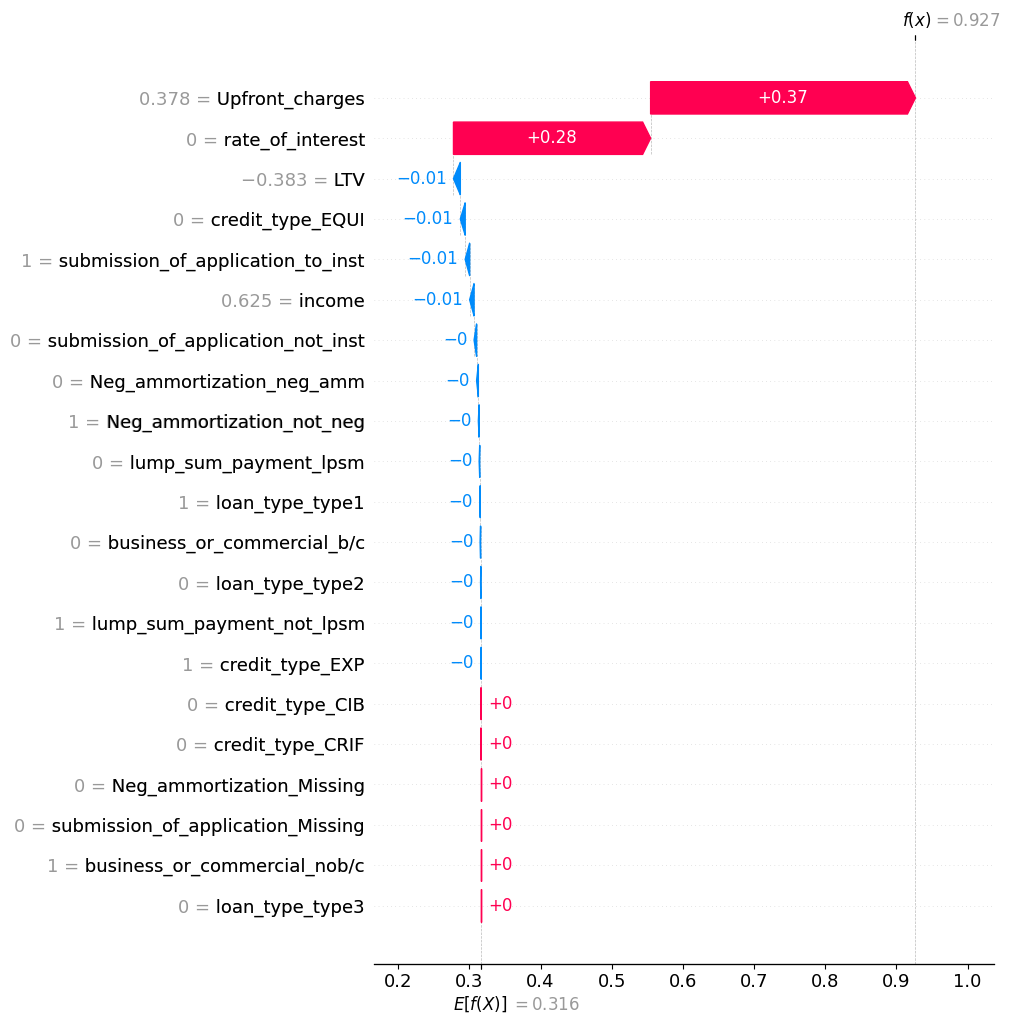

In [60]:

# exp = shap.Explanation(
#     values = shap_values[50],
#     base_values = explainer.expected_value,
#     data = X_train_premodel.iloc[50, :],
# )

# local instance level explanation
shap.plots.waterfall(exps[50], max_display=22)

In [84]:
shap.initjs()
shap.plots.force(exps[101])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


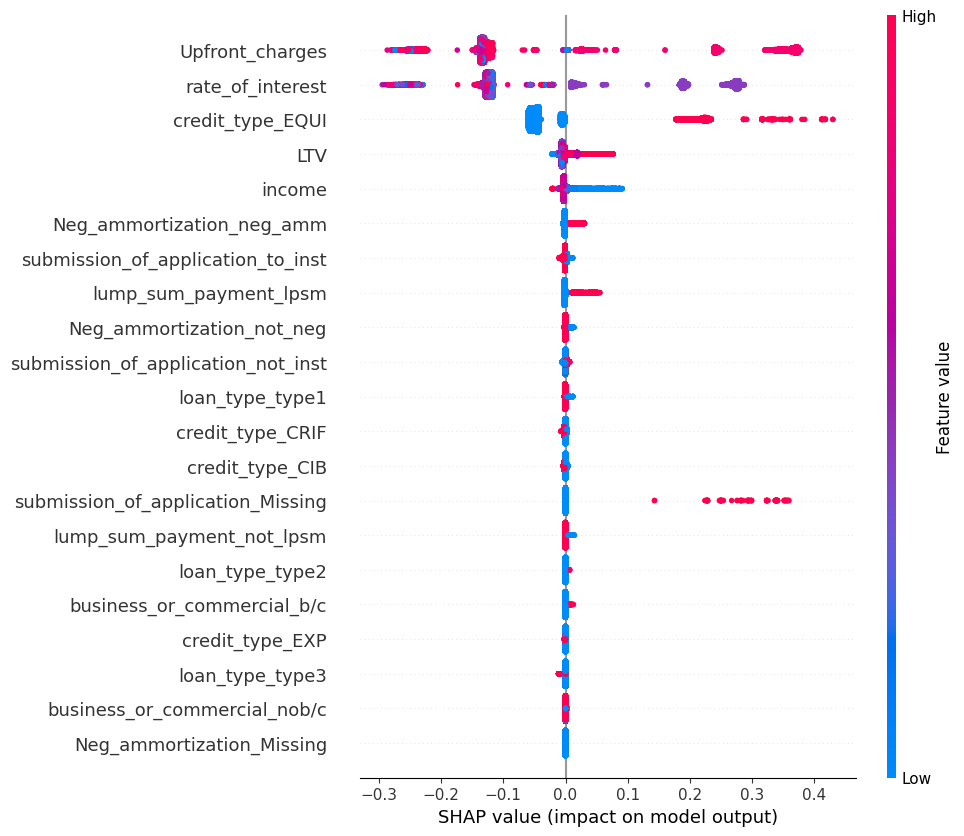

In [77]:
shap.plots.beeswarm(
    exps,
    max_display = 22
)